# Multi-Layer Perceptron from the scratch

Nowadays, multi-Layer neural network has been proved to be a powerful tool in many data science problems. Though many existing packages have provided the interfaces to call this function (e.g. scikit-learn), it would be good to write some toy model by your own. Through this practice, you will gain some experience in software engineering. More importantly, you will understand the underlying mathmatics better and know how to fix the troubles when you run the code from the existing softwares. In the tutorial, we will continue to use the wine data and figure out how to write our own MLP classfier.

Let us start with the example in the previous lecture
```
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
```
<img src="img/MLP.jpeg" style="width: 800px;"/>
<center> Figure 1, the MLP model used in this lecture</center>

You should be able to understand most of the parameters at the moment. To realize a minimum version of MLP, we can try to implement the following parameters into our model:
- hidden_layer_sizes: to make life easier, let us just consider 2 hidden layer models
- max_iter: maximum number of iteractions
- learning_rate_init: 

Note that we will completely ignore the terms related to regularization

## Back propagation
$$\frac{\partial L}{\partial y} = y-Y$$
$$\frac{\partial y}{\partial f_3} = $$
$$\frac{\partial f_3}{\partial h_2} = $$

In [1]:
#Obtain and preprocess the data
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import numpy as np

data=load_wine()
x, Y = data.data, data.target # in, out data

# scale data
scaler = StandardScaler()  
scaler.fit(x)  
x0 = scaler.transform(x) 

In [2]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
class my_MLPClassifier(object):
    """
    Basic MultiLayer Perceptron (MLP) neural network.
    Args:
    hidden layer: []
    max_iterations: []
    """
    def __init__(self, hidden, iterations, learning_rate, decay_rate, activation, loss):
        """
        :param hidden: number of hidden neurons
        :param iterations: how many epochs
        :param learning_rate: initial learning rate
        """
        # initialize input parameters
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.n_hid1, self.n_hid2 = hidden[0], hidden[1]
        self.activation_method = activation
        self.loss_method= loss
        
    def fit(self, input, target):      
        """
        input: 2D array, N_sample * N_attributes
        output: 1D array, N_sample * 1
        """
        # Initialize the weights and bias according to the input/target data
        dim_in, dim_out = input.shape[1], 1
        self.w1 = np.random.randn(dim_in, self.n_hid1) # [13,4] -- 52 weights 
        self.w2 = np.random.randn(self.n_hid1, self.n_hid2) # [4,4] -- 16 weights
        self.w3 = np.random.randn(self.n_hid2, dim_out) # [4,1] -- 4 weights
        self.b1 = np.random.randn(1,self.n_hid1) # [1,4] -- 4 biases
        self.b2 = np.random.randn(1,self.n_hid2) # [1,4] -- 4 biases
        self.b3 = np.random.randn(1,dim_out)  # [1,1] -- 1 bias
        loss_hist = [] # track loss for printing
        
        """
        training
        """
        
        for i in range(self.iterations):
            # forward: input --> hidden layer 1 -- hidden layer 2 -- output
            (h1, h2, y) = self.forward(input,self.w1,self.w2,self.w3,self.b1,self.b2,self.b3)
            
            # evaluate and print the loss function
            loss = self.loss(y, target)
            loss_hist.append(loss)
            
            # backprop: output --> hidden layer 2 --> hidden layer 1 --> input
            """
            deltas are the derivatives of the inputs and outputs of the nodes which are used to find the gradients
            of the parameters with respect to the cost: gradw & gradb.
            
            after finding gradw and gradb, the weights and biases are updated.
            """
            
            delta3 = self.grad_loss(y, target) * self.grad_activation(y) 
            gradw3 = np.dot(delta3, h2)
            gradb3 = np.sum(delta3)

            delta2 = (np.transpose(np.dot(self.w3,np.transpose(np.vstack(delta3)))) * 
                      self.grad_activation(h2))
            gradw2 = np.dot(np.transpose(delta2),h1)
            gradb2 = np.sum(delta2)
            
            delta = (np.transpose(np.dot(self.w2,np.transpose(np.vstack(delta2)))) * 
                     self.grad_activation(h1))
            gradw = np.transpose(np.dot(np.transpose(delta),input))
            gradb = np.sum(delta)
            
            # updating the weight
            w3, b3, w2, b2, w1, b1 = self.w3.flatten(), self.b3, self.w2, self.b2, self.w1, self.b1
            learning_rate = self.learning_rate * (self.decay_rate**i)
            w3 -= learning_rate*gradw3
            b3 -= learning_rate*gradb3
            w2 -= learning_rate*gradw2
            b2 -= learning_rate*gradb2
            w1 -= learning_rate*gradw
            b1 -= learning_rate*gradb
        self.weights = (w3, w2, w1)
        self.bias = (b3, b2, b1)
        print('loss is {:4f} after {:4d} iterations'.format(loss, self.iterations))
        plt.title('training curve')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.plot(np.arange(0,self.iterations),loss_hist)
  
    def loss(self, y, target):
        if self.loss_method=='mse':
            return 0.5*np.sum(np.power(y-target,2))/y.shape[0]
        elif self.loss.method=='log_loss':
            pass
        else:
            raise Notimplementederror
    
    def grad_loss(self, y, target):
        if self.loss_method=='mse':
            return y-target
        elif self.loss_method=='log_loss':
            pass
        else:
            raise NotImplementedError

    def activation(self, x):
        return 1./(1+np.exp(-x))
    
    def grad_activation(self, x):
        if self.activation_method=='sigmoid':
            return self.activation(x)*(1-self.activation(x))
        elif self.activation_method=='log_loss':
            pass
        else:
            raise NotImplementedError
            
    def forward(self, X, w1, w2, w3, b1, b2, b3):
        h1 = self.activation(np.dot(X,w1)+b1)
        h2 = self.activation(np.dot(h1,w2)+b2)
        y = self.activation(np.dot(h2,w3)+b3)
        return (h1, h2, y.flatten())
        
    def predict(self, X):
        """
        return predictions after training algorithm
        """
        (h1, h2, y) = self.forward(X)
        return y

loss is 0.302665 after 1000 iterations


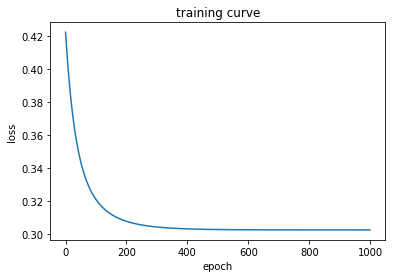

In [3]:
### mlp parameters
hidd_layers = [4,4]
max_iter = 1000
lr = 0.001
decay = 0.99
activation = 'sigmoid'
loss = 'mse'

my_mlp = my_MLPClassifier(hidd_layers,max_iter,lr,decay,activation,loss)
my_mlp.fit(x0, Y)